In [47]:
from amuse.io import read_set_from_file, write_set_to_file
from amuse.community.huayno.interface import Huayno
from amuse.units import units, nbody_system

import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

In [48]:
bodies = read_set_from_file("input_filename.amuse", "amuse")

In [49]:
names=['jupiter','moon1','moon2','moon3','moon4','moon5','moon6','moon7']
bodies.name=names

In [50]:
print(bodies)

                 key         mass         name  potential_in_code       radius        tau_a        tau_e     timestep         type           vx           vy           vz            x            y            z
                   -  1.98892e+30 * kg         none  m**2 * s**-2            m  31556925.993600003 * s  31556925.993600003 * s            s         none  3646245880.3572216 * m * s**-1  3646245880.3572216 * m * s**-1  3646245880.3572216 * m * s**-1  149597870691.0 * m  149597870691.0 * m  149597870691.0 * m
====================  ===========  ===========  ===========  ===========  ===========  ===========  ===========  ===========  ===========  ===========  ===========  ===========  ===========  ===========
 2703836777149376157    9.550e-04      jupiter   -4.999e+04   -1.669e+09         -inf         -inf    1.517e+02         star    4.626e-10   -2.243e-10   -3.916e-12   -6.059e-04    4.234e-05    7.390e-07
   33416054852176473    4.504e-08        moon1   -3.946e+08   -1.669e+09    

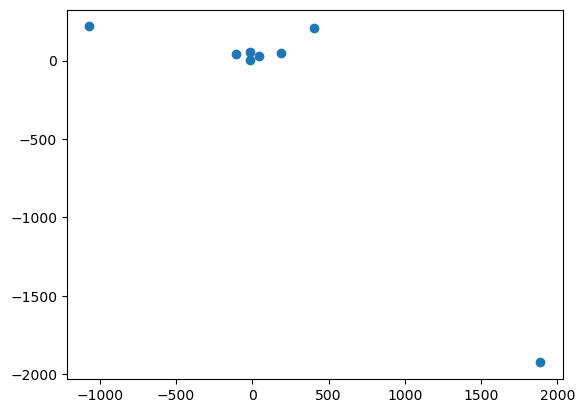

In [51]:
plt.scatter(bodies.x.value_in(units.REarth), bodies.y.value_in(units.REarth))

In [52]:
from amuse.ext.orbital_elements import orbital_elements, generate_binaries
for body in bodies:
    print(orbital_elements(body, bodies[0]))

(quantity<0.000955 1.98892e+30 * kg>, quantity<0.000955 1.98892e+30 * kg>, quantity<[0.0] 149597870691.0 * m>, array([ nan]), quantity<[nan] rad>, quantity<[nan] rad>, quantity<[0.0] rad>, quantity<[0.0] rad>)
(quantity<4.50410272912e-08 1.98892e+30 * kg>, quantity<0.000955 1.98892e+30 * kg>, quantity<[0.00182687740114] 149597870691.0 * m>, array([ 0.18914239]), quantity<[-2.82718016319] rad>, quantity<[0.0174532925199] rad>, quantity<[1.66946641044e-14] rad>, quantity<[1.21214315534] rad>)
(quantity<4.50410272912e-08 1.98892e+30 * kg>, quantity<0.000955 1.98892e+30 * kg>, quantity<[0.00245524747125] 149597870691.0 * m>, array([ 0.18542124]), quantity<[2.47333616014] rad>, quantity<[0.0174532925199] rad>, quantity<[-1.11146747244e-13] rad>, quantity<[1.16556449861] rad>)
(quantity<4.50410272912e-08 1.98892e+30 * kg>, quantity<0.000955 1.98892e+30 * kg>, quantity<[0.00474276882877] 149597870691.0 * m>, array([ 0.31301075]), quantity<[1.59251357892] rad>, quantity<[0.0174532925199] rad>,

/home/ybadoux/amuse-src/src/amuse/units/quantities.py:146: RuntimeWarning: invalid value encountered in divide
  operator.__truediv__(self.number, other.number),


In [53]:
help(generate_binaries)

Help on function generate_binaries in module amuse.ext.orbital_elements:

generate_binaries(primary_mass, secondary_mass, semi_major_axis, eccentricity=0, true_anomaly=quantity<0 rad>, inclination=quantity<0 rad>, longitude_of_the_ascending_node=quantity<0 rad>, argument_of_periapsis=quantity<0 rad>, G=None)
    returns two particlesets, which contain the primaries and the secondaries
    in binary pairs.



In [31]:
from amuse.lab import Particles, Particle

host_star = Particle()
host_star.mass = 1 | units.MSun
host_star.position = [0, 0, 0] | units.AU
host_star.velocity = [0, 0, 0] | units.kms

star, planet = generate_binaries(1|units.MSun, 1|units.MJupiter, 10|units.AU)
bodies.position += planet.position
bodies.velocity += planet.velocity
star.name = 'star'

bodies.add_particle(star)
bodies.move_to_center()

flyby = Particle()
flyby.mass = 1 | units.MSun
flyby.position = [-100, 100, 0] | units.AU
flyby.velocity = [10, 0, 0] | units.kms
flyby.name = 'flyby'

bodies.add_particle(flyby)

In [32]:
converter = nbody_system.nbody_to_si(bodies.mass.sum(), 0.1|units.AU)
gravity = Huayno(converter)
gravity.particles.add_particles(bodies)

xs = np.zeros((1000, len(bodies)))
ys = np.zeros((1000, len(bodies)))
zs = np.zeros((1000, len(bodies)))

times = np.linspace(0, 1000, 1000) | units.yr
for i,time in tqdm(enumerate(times)):
    gravity.evolve_model(time)
    xs[i] = gravity.particles.x.value_in(units.AU)
    ys[i] = gravity.particles.y.value_in(units.AU)
    zs[i] = gravity.particles.z.value_in(units.AU)

gravity.stop()

1000it [01:58,  8.47it/s]


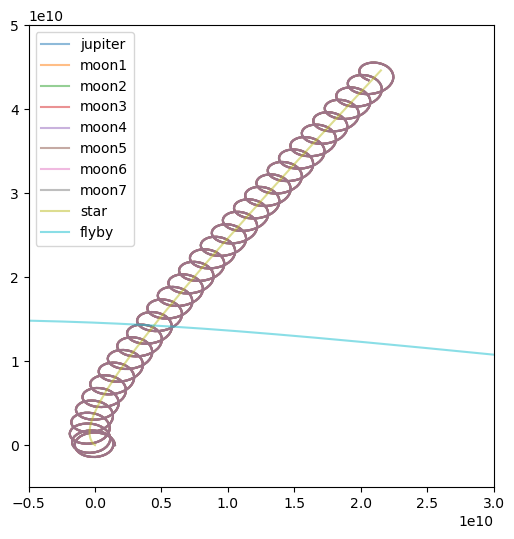

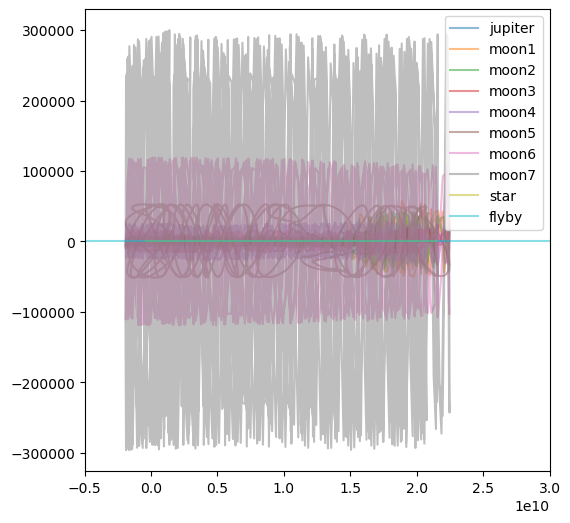

In [45]:
plt.figure(figsize=(6,6))
for i in range(len(bodies)):
    plt.plot(xs[:,i], ys[:,i], label=bodies[i].name, alpha=0.5)
# plt.plot(xs[:,0], ys[:,0], label='jup', color='black')
plt.xlim(-0.5e10, 0.3e11)
plt.ylim(-0.5e10, 5e10)
plt.legend()
plt.show()

plt.figure(figsize=(6,6))
for i in range(len(bodies)):
    plt.plot(xs[:,i], zs[:,i], label=bodies[i].name, alpha=0.5)
# plt.plot(xs[:,0], ys[:,0], label='jup', color='black')
plt.xlim(-0.5e10, 0.3e11)
# plt.ylim(-0.5e10, 5e10)
plt.legend()
plt.show()